In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

In [2]:
df_true = pd.read_csv('datasets/aniso_1000_20.00_25.00_2.00.csv')
df_true = df_true[df_true.layer==0]
df_true

,index,x,y,layer,weight,rho,delta,nh,isSeed,clusterId
0,0,-51.86,-64.09,0,1,16.0,1.12272,297,0,5
1,1,171.87,-154.07,0,1,23.5,2.59943,495,0,1
2,2,-108.29,15.32,0,1,25.0,4.69145,10,0,0
3,3,175.75,-161.11,0,1,21.5,1.18228,251,0,1
4,4,-111.26,129.91,0,1,14.5,4.88806,144,0,4
...,...,...,...,...,...,...,...,...,...,...
995,995,84.03,-154.88,0,1,1.0,999.00000,-1,0,-1
996,996,203.62,87.55,0,1,1.5,999.00000,-1,0,-1
997,997,108.69,-23.25,0,1,5.0,3.33714,127,0,3
998,998,185.02,141.46,0,1,2.0,999.00000,-1,0,-1


In [3]:
df_true.columns

Index(['index', 'x', 'y', 'layer', 'weight', 'rho', 'delta', 'nh', 'isSeed',
       'clusterId'],
      dtype='object')

In [4]:
isSeed = df_true.apply(lambda x: x['isSeed']>0 and x['nh']>=0, axis=1) 

# sn.scatterplot(df_true.x, df_true.y, isSeed)

/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

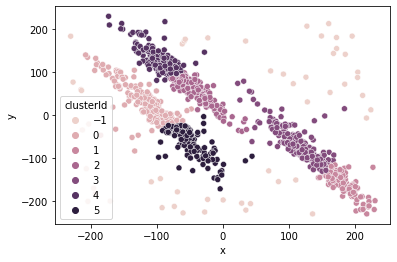

In [5]:
sn.scatterplot(df_true.x, df_true.y, df_true.clusterId)

/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

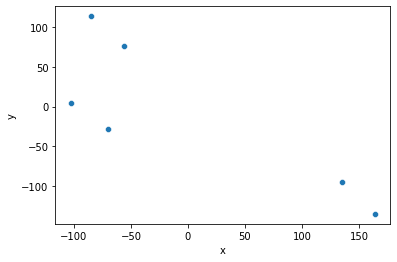

In [6]:
df_seed = df_true[df_true.isSeed>0]
sn.scatterplot(df_seed.x, df_seed.y)

6 seeds, cluster looks accurate


In [7]:
df = pd.read_csv('D1.csv')
df.head()

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta
0,0,-51.86,-64.09,0.0,1.0,16.0,147.0,2.0,0.0,0.0,0.0
1,1,98.02,-43.68,0.0,1.0,16.5,572.0,6.0,0.0,0.0,0.0
2,2,-66.32,-35.50,0.0,1.0,27.5,205.0,2.0,0.0,0.0,0.0
3,3,-52.16,-34.61,0.0,1.0,18.5,199.0,2.0,0.0,0.0,0.0
4,4,-82.97,-17.03,0.0,1.0,25.5,541.0,2.0,0.0,0.0,0.0


In [8]:
df_seeds = pd.read_csv('datasets/dataset1.csv')
df_seeds.head()

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta
0,0,-51.86,-64.09,0.0,1.0,16.0,147.0,2.0,0.0,0.0,0.0
1,1,98.02,-43.68,0.0,1.0,16.5,572.0,6.0,0.0,0.0,0.0
2,2,-66.32,-35.50,0.0,1.0,27.5,205.0,2.0,0.0,0.0,0.0
3,3,-52.16,-34.61,0.0,1.0,18.5,199.0,2.0,0.0,0.0,0.0
4,4,-82.97,-17.03,0.0,1.0,25.5,541.0,2.0,0.0,0.0,0.0


/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

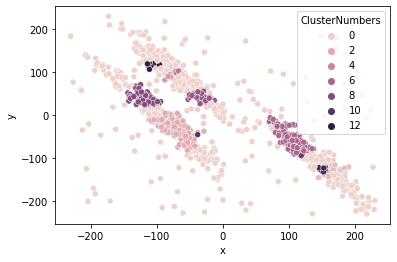

In [10]:
sn.scatterplot(df.x, df.y, df.ClusterNumbers)

In [11]:
df_no_outliers = df[df['isOutlier']==0]

/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

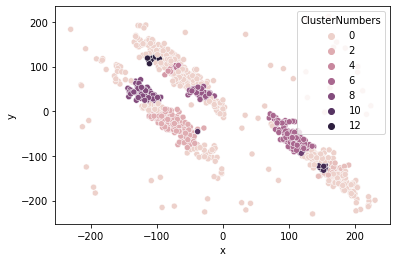

In [12]:
sn.scatterplot(df_no_outliers.x, df_no_outliers.y, df_no_outliers.ClusterNumbers)

In [15]:
df_outliers = df[df['isOutlier']==1]

/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

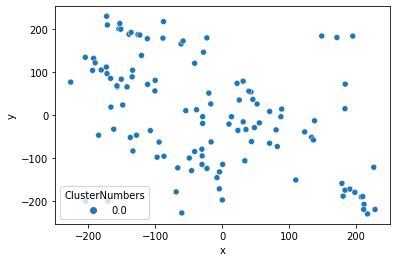

In [16]:
sn.scatterplot(df_outliers.x, df_outliers.y, df_outliers.ClusterNumbers)

In [19]:
df_clusters = df[df['ClusterNumbers']!=0]


/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

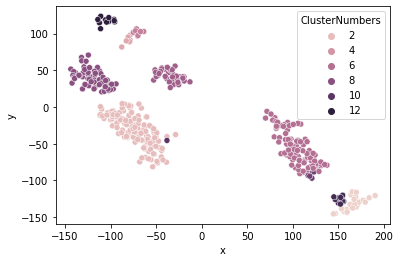

In [20]:
sn.scatterplot(df_clusters.x, df_clusters.y, df_clusters.ClusterNumbers)

In [23]:
df['ClusterNumbers'].value_counts()

0.0     597
2.0     136
6.0      98
8.0      60
7.0      37
1.0      28
12.0     12
11.0     12
3.0       7
5.0       7
9.0       5
10.0      1
Name: ClusterNumbers, dtype: int64